In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction de vraisemblance
def vraisemblance(theta, donnees):
    beta0, beta1 = theta
    xi, ni, yi = donnees[:, 0], donnees[:, 1], donnees[:, 2]

    theta_i = np.exp(beta0 + beta1 * xi) / (1 + np.exp(beta0 + beta1 * xi))
    log_vraisemblance = np.sum(yi * np.log(theta_i) + (ni - yi) * np.log(1 - theta_i))

    return log_vraisemblance

# Définir la fonction de prior
def prior_plat(theta):
    return 1

# Définir la fonction de posterior
def log_posterior(theta, donnees):
    return vraisemblance(theta, donnees) + np.log(prior_plat(theta))

# Algorithme Metropolis-Hastings
def echantillonneur_mcmc(theta_initial, donnees, ecart_type_proposition, n_echantillons):
    echantillons = [theta_initial]
    theta_actuel = theta_initial

    for i in range(n_echantillons):
        proposition = theta_actuel + ecart_type_proposition * np.random.randn(len(theta_actuel))

        alpha = min(1, np.exp(log_posterior(proposition, donnees) - log_posterior(theta_actuel, donnees)))
        if np.random.rand() < alpha:
            theta_actuel = proposition

        echantillons.append(theta_actuel)

    return np.array(echantillons)

# Définir les données
donnees_dose_reponse = np.array([
    [-0.86, 5, 0],
    [-0.30, 5, 1],
    [-0.05, 5, 3],
    [0.73, 5, 5]
])

# initialiser le nombre d'itérations MCMC
num_iterations = 10000

# initialiser les valeurs initiales des paramètres
parametres_initiaux = np.array([0, 0])

# initialiser l'écart type de la proposition
ecart_type_proposition = np.array([0.1, 0.1])

echantillons = echantillonneur_mcmc(parametres_initiaux, donnees_dose_reponse, ecart_type_proposition, num_iterations)


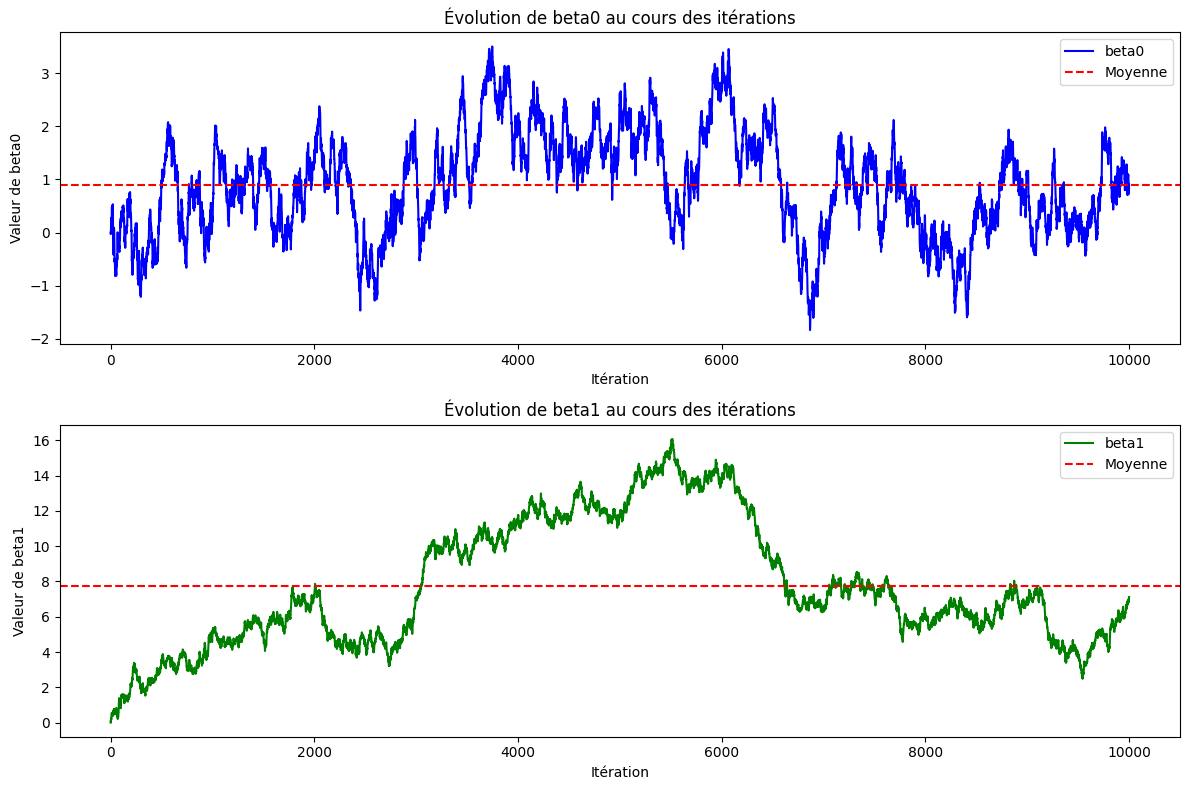

In [10]:
# trace l'évolution des paramètres au cours des itérations
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(echantillons[:, 0], label='beta0', color='blue')
plt.axhline(np.mean(echantillons[:, 0]), linestyle='dashed', color='red', label='Moyenne')
plt.title('Évolution de beta0 au cours des itérations')
plt.xlabel('Itération')
plt.ylabel('Valeur de beta0')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(echantillons[:, 1], label='beta1', color='green')
plt.axhline(np.mean(echantillons[:, 1]), linestyle='dashed', color='red', label='Moyenne')
plt.title('Évolution de beta1 au cours des itérations')
plt.xlabel('Itération')
plt.ylabel('Valeur de beta1')
plt.legend()

plt.tight_layout()
plt.show()


* **Évolution de beta0 au cours des itérations :**

La ligne bleue représente les valeurs de beta0 à chaque itération.
La ligne rouge en pointillés indique la moyenne des échantillons de beta0.
On observe que les valeurs de beta0 fluctuent autour de la moyenne, montrant une exploration de l'espace des paramètres. L'évolution suggère une convergence vers une région de l'espace des paramètres.


* **Évolution de beta1 au cours des itérations :**

La ligne verte représente les valeurs de beta1 à chaque itération.
La ligne rouge en pointillés indique la moyenne des échantillons de beta1.
De manière similaire à beta0, les valeurs de beta1 montrent des fluctuations autour de la moyenne, indiquant une exploration de l'espace des paramètres. Il semble y avoir une certaine stabilité après un certain nombre d'itérations.

<ipython-input-5-7653471d990a>:6: RuntimeWarning: invalid value encountered in divide
  return -beta0 / beta1


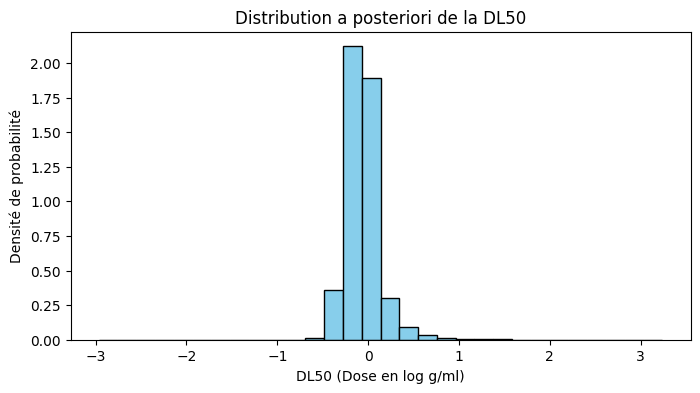

In [11]:


# Calculer la DL50 pour chaque échantillon dans la chaîne MCMC
dl50_samples = calculate_dl50(samples[:, 0], samples[:, 1])

plt.figure(figsize=(8, 4))
plt.hist(dl50_samples, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Distribution a posteriori de la DL50')
plt.xlabel('DL50 (Dose en log g/ml)')
plt.ylabel('Densité de probabilité')
plt.show()


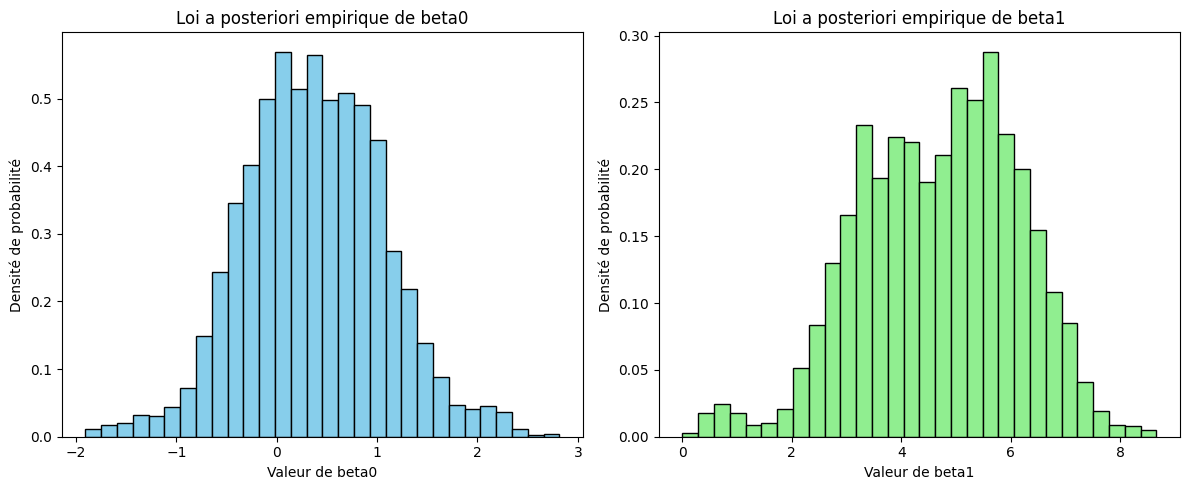

In [12]:


# Histogramme pour la loi a posteriori empirique de beta0
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(samples[:, 0], bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Loi a posteriori empirique de beta0')
plt.xlabel('Valeur de beta0')
plt.ylabel('Densité de probabilité')

# Histogramme pour la loi a posteriori empirique de beta1
plt.subplot(1, 2, 2)
plt.hist(samples[:, 1], bins=30, density=True, color='lightgreen', edgecolor='black')
plt.title('Loi a posteriori empirique de beta1')
plt.xlabel('Valeur de beta1')
plt.ylabel('Densité de probabilité')

plt.tight_layout()
plt.show()
